### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [55]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/UCBerkelyML/ColabNotebooks/assignment5_1_starter/data/coupons.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [57]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the first 5 rows
#print(data.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
#print(data.info())

# Calculate the total number of rows in the DataFrame
total_rows = data.shape[0]

# Count the number of missing values in each column
missing_values_count = data.isnull().sum()

# Calculate the percentage of missing values
missing_values_percentage = (missing_values_count / total_rows) * 100

# Create a DataFrame to display the missing values
missing_values_df = pd.DataFrame({
    'Missing Count': missing_values_count,
    'Missing Percentage (%)': missing_values_percentage
})

# Filter to show only columns with missing values and sort them
missing_values_df = missing_values_df[missing_values_df['Missing Count'] > 0].sort_values(by='Missing Percentage (%)', ascending=False)

# Display the missing values information
print("Missing values in each column:\n")
print(missing_values_df.to_markdown(numalign="left", stralign="left"))

# Identify object type columns
object_cols = data.select_dtypes(include='object').columns

# Display unique values for each object column
for col in object_cols:
    print(f"\nUnique values for column '{col}':")
    print(data[col].unique())
print("observations")
print("Car -This column has a substantial amount of missing data (99.15), indicating that almost all values are absent")
print("CoffeeHouse, Restaurant20To50, CarryAway, RestaurantLessThan20, Bar: These columns have a relatively small percentage of missing values, ranging from 0.84 to 1.71")
print("Categorical Data Consistency:All categorical (object type) columns, including destination, passanger, weather, time, coupon, expiration, gender, age, maritalStatus, education, occupation,income, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50 were checked for unique values.")

Missing values in each column:

|                      | Missing Count   | Missing Percentage (%)   |
|:---------------------|:----------------|:-------------------------|
| car                  | 12576           | 99.1485                  |
| CoffeeHouse          | 217             | 1.71082                  |
| Restaurant20To50     | 189             | 1.49007                  |
| CarryAway            | 151             | 1.19048                  |
| RestaurantLessThan20 | 130             | 1.02491                  |
| Bar                  | 107             | 0.843582                 |

Unique values for column 'destination':
['No Urgent Place' 'Home' 'Work']

Unique values for column 'passanger':
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

Unique values for column 'weather':
['Sunny' 'Rainy' 'Snowy']

Unique values for column 'time':
['2PM' '10AM' '6PM' '7AM' '10PM']

Unique values for column 'coupon':
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


3. Decide what to do about your missing data -- drop, replace, other...

In [58]:
print("Dropping car column (99.15% missing) and CoffeeHouse, Restaurant20To50, CarryAway, RestaurantLessThan20, and Bar columns (0.84% to 1.71% missing) will be replaced by mode ")

# Drop the 'car' column
data = data.drop(columns=['car'])

# Columns to impute with mode
columns_to_impute = ['CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar']

# Impute missing values with the mode for each specified column
for col in columns_to_impute:
    mode_value = data[col].mode()[0]
    data.fillna({col: mode_value}, inplace=True)

# Verify that there are no more missing values in the specified columns
missing_values_count_after = data[columns_to_impute].isnull().sum()
missing_values_percentage_after = (missing_values_count_after / data.shape[0]) * 100

# Create a DataFrame to display the missing values
missing_values_df_after = pd.DataFrame({
    'Missing Count': missing_values_count_after,
    'Missing Percentage (%)': missing_values_percentage_after
})

print("\nMissing values in imputed columns after imputation:\n")
print(missing_values_df_after.to_markdown(numalign="left", stralign="left"))

Dropping car column (99.15% missing) and CoffeeHouse, Restaurant20To50, CarryAway, RestaurantLessThan20, and Bar columns (0.84% to 1.71% missing) will be replaced by mode 

Missing values in imputed columns after imputation:

|                      | Missing Count   | Missing Percentage (%)   |
|:---------------------|:----------------|:-------------------------|
| CoffeeHouse          | 0               | 0                        |
| Restaurant20To50     | 0               | 0                        |
| CarryAway            | 0               | 0                        |
| RestaurantLessThan20 | 0               | 0                        |
| Bar                  | 0               | 0                        |


4. What proportion of the total observations chose to accept the coupon?



In [59]:
# Calculate the proportion of accepted coupons
proportion_accepted = data['Y'].sum() / len(data)

# Print the proportion
print(f"Proportion of accepted coupons: {proportion_accepted:.2f}")

Proportion of accepted coupons: 0.57


5. Use a bar plot to visualize the `coupon` column.

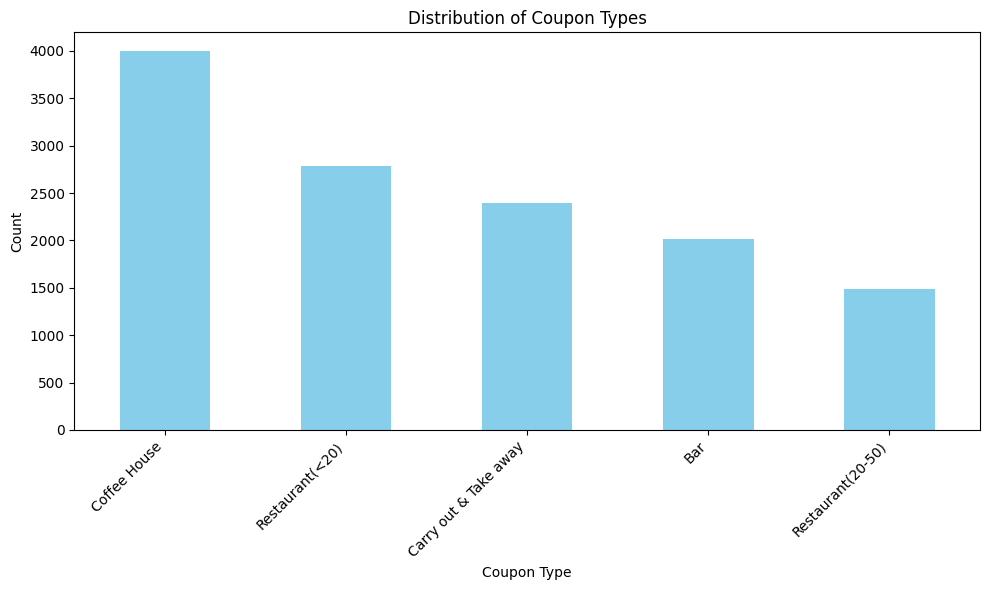

In [60]:
import altair as alt

# Count the occurrences of each unique value in the 'coupon' column
coupon_counts = data['coupon'].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(10, 6))
coupon_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from being cut off

plt.show()

# Save the plot as a PNG file
plt.savefig('/content/drive/My Drive/UCBerkelyML/ColabNotebooks/assignment5_1_starter/images/coupon_distribution_bar_plot_matplotlib.png')
plt.close()




6. Use a histogram to visualize the temperature column.

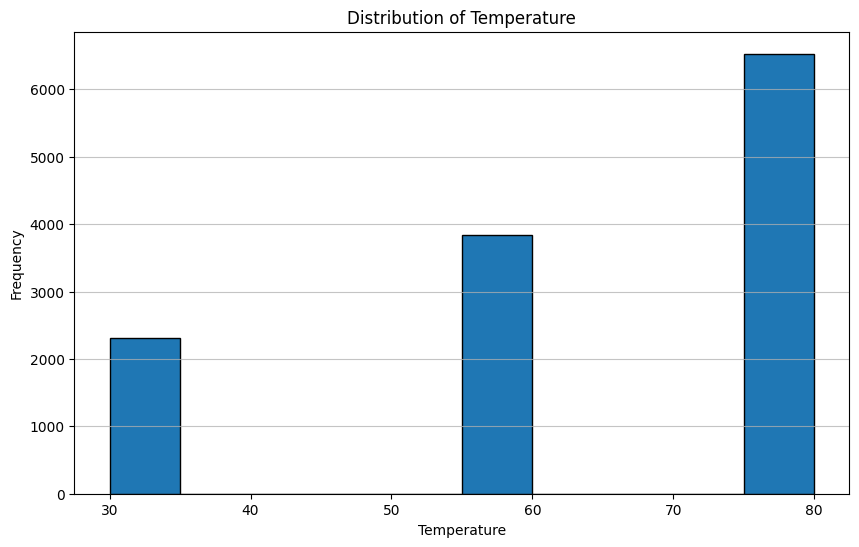

<Figure size 640x480 with 0 Axes>

In [61]:
import matplotlib.pyplot as plt

# Create a histogram of the 'temperature' column
plt.figure(figsize=(10, 6))
plt.hist(data['temperature'], bins=10, edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()
# Save the plot as a PNG file
plt.savefig('temperature_distribution_histogram.png')
plt.close()
# Save the chart as a JSON file
plt.savefig('/content/drive/My Drive/UCBerkelyML/ColabNotebooks/assignment5_1_starter/images/temperature_distribution_histogram.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [62]:
# Create a new DataFrame containing only rows where the 'coupon' column is 'Bar'
bar_coupons_df = data[data['coupon'] == 'Bar']

# Display the first 5 rows of the new DataFrame
print(bar_coupons_df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the number of rows and columns in the new DataFrame
print(f"\nShape of the new DataFrame (bar_coupons_df): {bar_coupons_df.shape}")

| destination     | passanger   | weather   | temperature   | time   | coupon   | expiration   | gender   | age   | maritalStatus     | has_children   | education                | occupation                 | income          | Bar   | CoffeeHouse   | CarryAway   | RestaurantLessThan20   | Restaurant20To50   | toCoupon_GEQ5min   | toCoupon_GEQ15min   | toCoupon_GEQ25min   | direction_same   | direction_opp   | Y   |
|:----------------|:------------|:----------|:--------------|:-------|:---------|:-------------|:---------|:------|:------------------|:---------------|:-------------------------|:---------------------------|:----------------|:------|:--------------|:------------|:-----------------------|:-------------------|:-------------------|:--------------------|:--------------------|:-----------------|:----------------|:----|
| No Urgent Place | Kid(s)      | Sunny     | 80            | 10AM   | Bar      | 1d           | Female   | 21    | Unmarried partner | 1              | Some coll

2. What proportion of bar coupons were accepted?


In [63]:
# Calculate the proportion of accepted bar coupons
proportion_accepted_bar_coupons = bar_coupons_df['Y'].sum() / len(bar_coupons_df)

# Print the proportion
print(f"Proportion of accepted bar coupons: {proportion_accepted_bar_coupons:.2f}")

Proportion of accepted bar coupons: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [64]:
# Define categories for bar frequency
bar_frequency_le3 = ['never', 'less1', '1~3']
bar_frequency_gt3 = ['4~8', 'gt8']

# Filter bar coupons for those who went to a bar 3 or fewer times a month
bar_coupons_le3 = bar_coupons_df[bar_coupons_df['Bar'].isin(bar_frequency_le3)]

# Filter bar coupons for those who went to a bar more than 3 times a month
bar_coupons_gt3 = bar_coupons_df[bar_coupons_df['Bar'].isin(bar_frequency_gt3)]

# Calculate acceptance rate for those who went 3 or fewer times
acceptance_rate_le3 = bar_coupons_le3['Y'].mean()

# Calculate acceptance rate for those who went more than 3 times
acceptance_rate_gt3 = bar_coupons_gt3['Y'].mean()

# Print the comparison
print(f"Acceptance rate for bar coupons (went 3 or fewer times a month): {acceptance_rate_le3:.2f}")
print(f"Acceptance rate for bar coupons (went more than 3 times a month): {acceptance_rate_gt3:.2f}")

Acceptance rate for bar coupons (went 3 or fewer times a month): 0.37
Acceptance rate for bar coupons (went more than 3 times a month): 0.77


Here's the comparison of bar coupon acceptance rates based on bar visit frequency:

Acceptance rate for bar coupons (went 3 or fewer times a month): 0.37 (37)

Acceptance rate for bar coupons (went more than 3 times a month): 0.77 (77)

Based on these results, individuals who went to a bar more than 3 times a month had a significantly higher acceptance rate for bar coupons compared to those who went 3 or fewer times a month.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [66]:
# Map age categories to numerical values for comparison
age_mapping = {
    'below21': 20,
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 50
}
#bar_coupons_df['age_numeric'] = bar_coupons_df['age'].map(age_mapping)
bar_coupons_df.loc[:, 'age_numeric'] = bar_coupons_df['age'].map(age_mapping)
# Define categories for bar frequency "more than once a month"
bar_frequency_gt1 = ['1~3', '4~8', 'gt8']

# Filter for the target group: bar frequency > 1 AND age > 25
target_group = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(bar_frequency_gt1)) &
    (bar_coupons_df['age_numeric'] > 25)
]

# Create the 'other' group (all remaining observations in bar_coupons_df)
other_group = bar_coupons_df[
    ~((bar_coupons_df['Bar'].isin(bar_frequency_gt1)) &
      (bar_coupons_df['age_numeric'] > 25))
]

# Calculate acceptance rates
acceptance_rate_target = target_group['Y'].mean()
acceptance_rate_other = other_group['Y'].mean()

print(f"Acceptance rate for drivers who go to a bar more than once a month AND are over 25: {acceptance_rate_target:.2f}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_other:.2f}")

# Compare and state the difference
if acceptance_rate_target > acceptance_rate_other:
    print("There is a difference: The target group has a higher acceptance rate.")
elif acceptance_rate_target < acceptance_rate_other:
    print("There is a difference: The target group has a lower acceptance rate.")
else:
    print("There is no significant difference in acceptance rates between the groups.")

Acceptance rate for drivers who go to a bar more than once a month AND are over 25: 0.70
Acceptance rate for all other drivers: 0.34
There is a difference: The target group has a higher acceptance rate.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [67]:
# Define categories for bar frequency "more than once a month"
bar_frequency_gt1 = ['1~3', '4~8', 'gt8']

# Define occupations to exclude
excluded_occupation = 'Farming Fishing & Forestry'

# Filter for the target group:
# 1. Bar frequency > 1
# 2. Passenger is NOT 'Kid(s)'
# 3. Occupation is NOT 'Farming Fishing & Forestry'
target_group_new_criteria = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(bar_frequency_gt1)) &
    (bar_coupons_df['passanger'] != 'Kid(s)') &
    (bar_coupons_df['occupation'] != excluded_occupation)
]

# Create the 'other' group
other_group_new_criteria = bar_coupons_df[
    ~((bar_coupons_df['Bar'].isin(bar_frequency_gt1)) &
      (bar_coupons_df['passanger'] != 'Kid(s)') &
      (bar_coupons_df['occupation'] != excluded_occupation))
]

# Calculate acceptance rates for the new groups
acceptance_rate_target_new = target_group_new_criteria['Y'].mean()
acceptance_rate_other_new = other_group_new_criteria['Y'].mean()

print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry: {acceptance_rate_target_new:.2f}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_other_new:.2f}")

# Compare and state the difference
if acceptance_rate_target_new > acceptance_rate_other_new:
    print("There is a difference: The target group has a higher acceptance rate.")
elif acceptance_rate_target_new < acceptance_rate_other_new:
    print("There is a difference: The target group has a lower acceptance rate.")
else:
    print("There is no significant difference in acceptance rates between the groups.")

Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry: 0.71
Acceptance rate for all other drivers: 0.30
There is a difference: The target group has a higher acceptance rate.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# Observations

Summary of Acceptance of Bar coupons based on two conditons .

# Acceptance Rate of Bar coupons and Acceptance rate dependence on frequency


The proportion of bar coupons that were accepted is 0.41, or 41.

Here's the comparison of bar coupon acceptance rates based on bar visit frequency:

Acceptance rate for bar coupons (went 3 or fewer times a month): 0.37 (37)
Acceptance rate for bar coupons (went more than 3 times a month): 0.77 (77)

**Observation**
Based on these results, individuals who went to a bar more than 3 times a month had a significantly higher acceptance rate for bar coupons compared to those who went 3 or fewer times a month.

# Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry.

Here's the comparison of bar coupon acceptance rates:

Acceptance rate for drivers who go to a bar more than once a month AND are over 25: 0.70 (70)
Acceptance rate for all other drivers: 0.34 (34)

There is a significant difference in acceptance rates between the groups. The target group (drivers who go to a bar more than once a month and are over the age of 25) has a substantially higher acceptance rate for bar coupons compared to all other drivers.

# **Combined observations of above two criterias**




***There is a noticeable difference. The target group defined by these combined criteria (frequent bar visitors, no kids as passengers, and specific occupations) shows a significantly higher acceptance rate for bar coupons compared to all other drivers.***

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Taking "Carry out & Take away" for Analyis

In [71]:
# Create a new DataFrame containing only rows where the 'coupon' column is 'Bar'
carryout_takeawy_coupons_df = data[data['coupon'] == 'Carry out & Take away']

# Display the first 5 rows of the new DataFrame
print(carryout_takeawy_coupons_df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the number of rows and columns in the new DataFrame
print(f"\nShape of the new DataFrame (carryout_takeawy_coupons_df): {carryout_takeawy_coupons_df.shape}")

| destination     | passanger   | weather   | temperature   | time   | coupon                | expiration   | gender   | age   | maritalStatus     | has_children   | education                | occupation                 | income          | Bar   | CoffeeHouse   | CarryAway   | RestaurantLessThan20   | Restaurant20To50   | toCoupon_GEQ5min   | toCoupon_GEQ15min   | toCoupon_GEQ25min   | direction_same   | direction_opp   | Y   |
|:----------------|:------------|:----------|:--------------|:-------|:----------------------|:-------------|:---------|:------|:------------------|:---------------|:-------------------------|:---------------------------|:----------------|:------|:--------------|:------------|:-----------------------|:-------------------|:-------------------|:--------------------|:--------------------|:-----------------|:----------------|:----|
| No Urgent Place | Friend(s)   | Sunny     | 80            | 10AM   | Carry out & Take away | 2h           | Female   | 21    | Unmarri

Calculate acceptance rate of Carry and Take out coupns based on Education , Income and number of passengers

In [72]:
# Create a new DataFrame containing only rows where the 'coupon' column is 'Carry out & Take away'
carry_away_coupons_df = data[data['coupon'] == 'Carry out & Take away']

# Display the first 5 rows of the new DataFrame
print(carry_away_coupons_df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the number of rows and columns in the new DataFrame
print(f"\nShape of the new DataFrame (carry_away_coupons_df): {carry_away_coupons_df.shape}")

# Calculate the proportion of accepted carry out & take away coupons
proportion_accepted_carry_away_coupons = carry_away_coupons_df['Y'].sum() / len(carry_away_coupons_df)

# Print the proportion
print(f"\nProportion of accepted carry out & take away coupons: {proportion_accepted_carry_away_coupons:.2f}")

| destination     | passanger   | weather   | temperature   | time   | coupon                | expiration   | gender   | age   | maritalStatus     | has_children   | education                | occupation                 | income          | Bar   | CoffeeHouse   | CarryAway   | RestaurantLessThan20   | Restaurant20To50   | toCoupon_GEQ5min   | toCoupon_GEQ15min   | toCoupon_GEQ25min   | direction_same   | direction_opp   | Y   |
|:----------------|:------------|:----------|:--------------|:-------|:----------------------|:-------------|:---------|:------|:------------------|:---------------|:-------------------------|:---------------------------|:----------------|:------|:--------------|:------------|:-----------------------|:-------------------|:-------------------|:--------------------|:--------------------|:-----------------|:----------------|:----|
| No Urgent Place | Friend(s)   | Sunny     | 80            | 10AM   | Carry out & Take away | 2h           | Female   | 21    | Unmarri

In [73]:
# Calculate acceptance rate based on income
acceptance_rate_income = carry_away_coupons_df.groupby('income')['Y'].mean().sort_values(ascending=False)
print("\nAcceptance rate of carry out & take away coupons by Income:")
print(acceptance_rate_income.to_markdown(numalign="left", stralign="left"))

# Calculate acceptance rate based on education
acceptance_rate_education = carry_away_coupons_df.groupby('education')['Y'].mean().sort_values(ascending=False)
print("\nAcceptance rate of carry out & take away coupons by Education:")
print(acceptance_rate_education.to_markdown(numalign="left", stralign="left"))

# Calculate acceptance rate based on number of passengers
acceptance_rate_passanger = carry_away_coupons_df.groupby('passanger')['Y'].mean().sort_values(ascending=False)
print("\nAcceptance rate of carry out & take away coupons by Passenger Type:")
print(acceptance_rate_passanger.to_markdown(numalign="left", stralign="left"))


Acceptance rate of carry out & take away coupons by Income:
| income           | Y        |
|:-----------------|:---------|
| $25000 - $37499  | 0.774869 |
| $50000 - $62499  | 0.772109 |
| $12500 - $24999  | 0.752907 |
| Less than $12500 | 0.75     |
| $62500 - $74999  | 0.726115 |
| $87500 - $99999  | 0.719298 |
| $37500 - $49999  | 0.71261  |
| $100000 or More  | 0.705882 |
| $75000 - $87499  | 0.656805 |

Acceptance rate of carry out & take away coupons by Education:
| education                              | Y        |
|:---------------------------------------|:---------|
| Some High School                       | 0.9375   |
| Associates degree                      | 0.817352 |
| Some college - no degree               | 0.76456  |
| High School Graduate                   | 0.745856 |
| Bachelors degree                       | 0.714286 |
| Graduate degree (Masters or Doctorate) | 0.653631 |

Acceptance rate of carry out & take away coupons by Passenger Type:
| passanger   | Y     

**Here's a summary of the findings:**

Overall Acceptance Rate for Carry out & Take away coupons:

Proportion of accepted carry out & take away coupons: 0.74 (74)

There is a noticeable trend where individuals with Some High School education have a very high acceptance rate (0.94), which gradually decreases with higher levels of education, with Graduate degree (Masters or Doctorate) having the lowest acceptance rate (0.65).

Passengers accompanied by Friend(s) have the highest acceptance rate (0.76), while those with Kid(s) as passengers have the lowest (0.70).

